In [4]:
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt

from numpy import multiply as m
from numpy import subtract as s
from numpy import divide as d
from numpy import add as a
import numpy as np


In [222]:
l=3; p=.6
yrmin=1960
yrmax=2021
years=np.linspace(yrmin,yrmax,yrmax-yrmin+1)
#Nations data
imax=266
dstring='gdp_data.csv'
#Regions Data
# imax=34
# dstring='gdp_data_agg.csv'
t0=yrmin-1
def g(x,l,p):
    return a(np.log(l),\
            a(np.multiply(p,\
                          np.log(x)\
                        ),\
                m((1-p),\
                     np.log(d(s(1,x),\
                            (l-1),
                             )\
                           )\
                 )\
             )\
            )

def dynamicGrowthRes(t,x0,k,r0):
    lbd  =d(t,k*l)
    den  =a(1,lbd)
    diag =np.power(d(a(m(p,lbd),x0),den),\
                   p\
                  )
    odiag=np.power(d(a(m(1-p,lbd),(1-x0)),m(l-1,den)),\
                   (1-p)\
                  )
    g=np.log(l*diag*odiag)
    return np.add(r0,g*t)
    
def genXs(Gs,l,p):
    
    X=np.linspace(.01,p,10000)
    #Computing the growth rates given the parameters and domain
    g=p*np.log(X*l)+(1-p)*np.log(l*(1-X)/(l-1))
    g_ind=np.argmax(g)
    #Computing the indices of where g(X)=G (lambda function gives us whichever value is closest
    xs=[np.where(g==min(g,key=lambda x:abs(x-G))) for G in Gs[:g_ind]]
    
    x=[X[xx][0] for xx in xs]
    
    return x

def v(l,x,p,w):
    return None

The following code imports national GDP data by year, and fits growth rate and volatility, and maps them to static x variables

In [214]:
def importData():
    c_data={}
    df = pd.read_csv (dstring)
    #Loads data and cuts years w/o data by country
    for i in range(imax):
        d_a=df.loc[i, '1960':'2021'].to_numpy(dtype=float)
        years_i=years[~np.isnan(d_a)]
        d_a=d_a[~np.isnan(d_a)]
        if len(d_a)>10:
            c_data[df.loc[i, 'Country Name']]={'years':years_i,'data':np.log(d_a)}

        if len(d_a)>60:
            ax = df.loc[i, str(yrmin):str(yrmax)].plot(logy=True)
            ax.set_xlabel("years")
            ax.set_ylabel("Log GDP")
    return c_data

def staticComputeParams(c_data,plot):
    means=np.zeros(imax)
    stderr=np.zeros(imax)
    for (ctry,data),i in zip(c_data.items(),range(imax)):
        res = sp.stats.linregress(x=data["years"], y=data['data'])
        means[i]=res.slope
        stderr[i]=res.stderr
    xs=genXs(means,l,p)
    
    if plot:
        plt.scatter(means,stderr,alpha=.5)
        plt.xlabel("Gammas")
        plt.ylabel("Volatility ")
        plt.show()


        plt.scatter(xs,g(xs,l,p),label="Computed")
        plt.scatter(xs,means,alpha=.5,label="Validated")
        plt.legend()
        plt.xlabel("Xs")
        plt.ylabel("Gammas")
        plt.show()
    return means,stderr,xs

def dynamicComputeParams(d_data,plot):
    k=np.zeros(imax)
    gammas=np.zeros(imax)
    ctr = []
    for (ctry,data),i in zip(d_data.items(),range(imax)):
        X=data['years']
        Y=data['data']
        X=s(X,X[0])
        ctr.append(ctry)
        (x0f,kf,r0f),pcov=sp.optimize.curve_fit(dynamicGrowthRes,X,Y,p0=[.5,1e2,26],maxfev=10000000)
        k[i]=kf
        gammas[i]=g(x0f,l,p)
        print(ctry)
        plt.plot(X,Y)
        plt.plot(X,dynamicGrowthRes(X,x0f,kf,r0f))
        plt.show()
    return ctr,gammas,k

def plotCtrData(ctr,gammas,k):
    fig, ax = plt.subplots(figsize=(10,10))
    plt.scatter((gammas),np.log(k),alpha=.5)
    plt.xlabel("Fitted Initial growth rate")
    plt.ylabel("Fitted Log Learning Rate")
    for c,x,y in zip(ctr,gammas,k):
        ax.annotate(c, (x, np.log(y)),alpha=.5)
    plt.show()


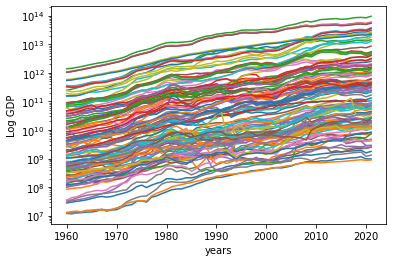

In [223]:
#volatility is standard error, right?
data=importData()

The below plots show a quick way for extracting static growth rates, volatilities. Now for computing static $l,x,p$. For the first case, we will simply fix $l=2,p=.7$ to find $x$

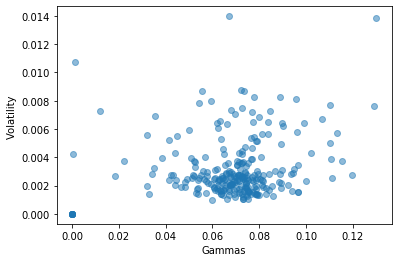

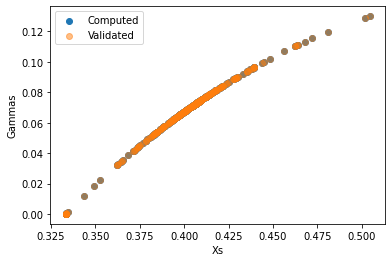

In [224]:
means,stderr,xs=staticComputeParams(data,plot=True)

Africa Eastern and Southern


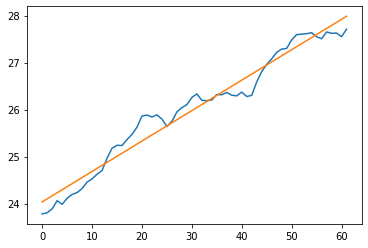

Africa Western and Central


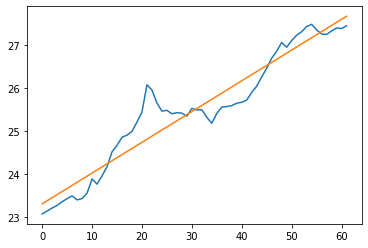

Arab World


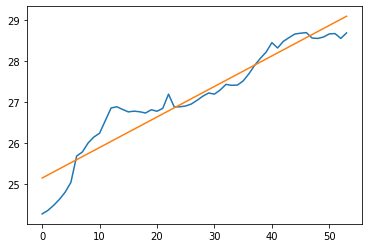

Central Europe and the Baltics


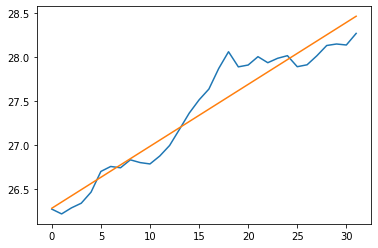

Caribbean small states


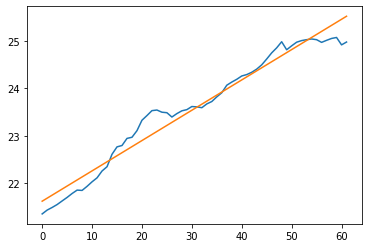

East Asia & Pacific (excluding high income)


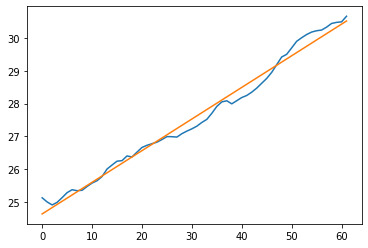

Early-demographic dividend


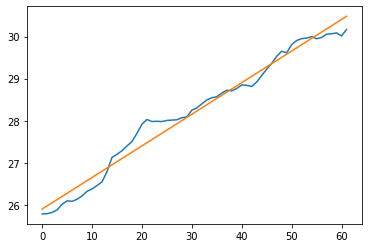

East Asia & Pacific


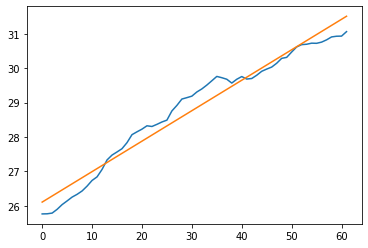

Europe & Central Asia (excluding high income)


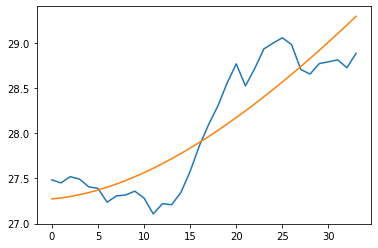

Europe & Central Asia


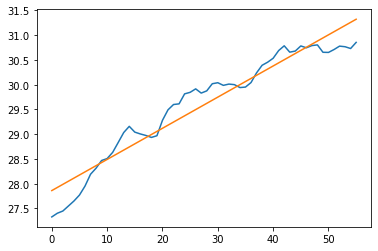

European Union


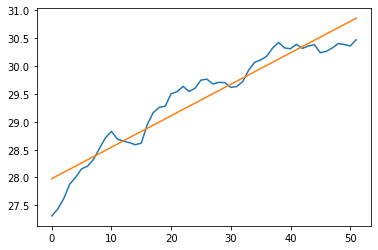

Fragile and conflict affected situations


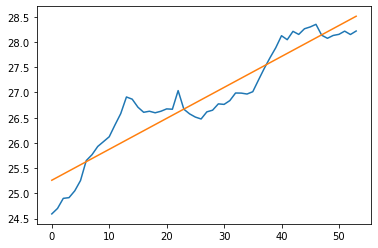

High income


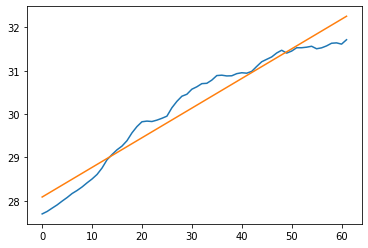

Heavily indebted poor countries (HIPC)


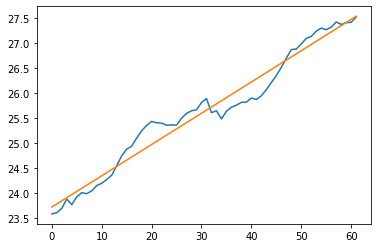

Latin America & Caribbean (excluding high income)


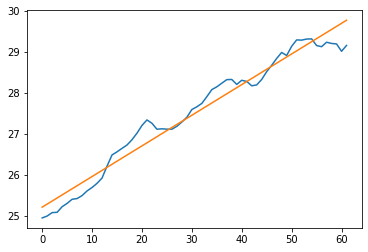

Latin America & Caribbean


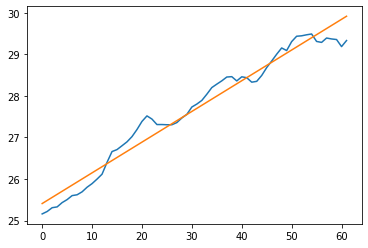

Least developed countries: UN classification


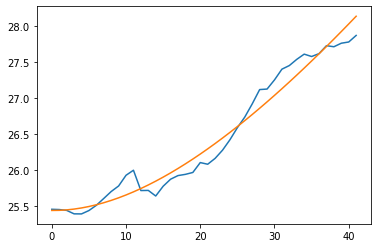

Low income


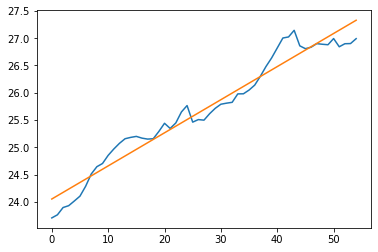

Lower middle income


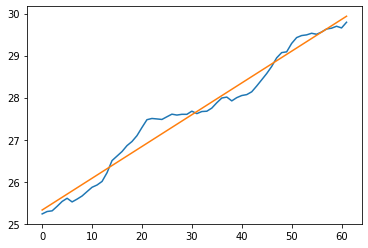

Low & middle income


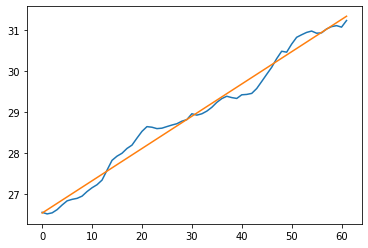

Middle East & North Africa


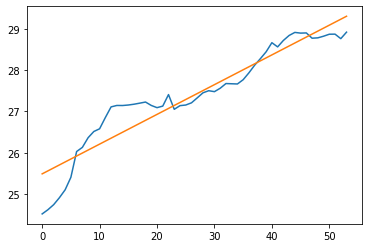

Middle income


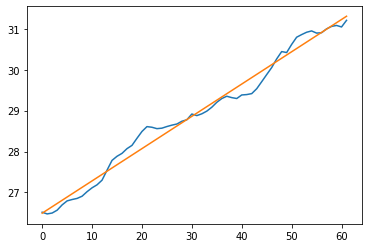

Middle East & North Africa (excluding high income)


/var/folders/f3/7npqvhls75s3wz_ddb_zvd7w0000gr/T/ipykernel_19752/1263870011.py:29: RuntimeWarning: invalid value encountered in power
  diag =np.power(d(a(m(p,lbd),x0),den),\


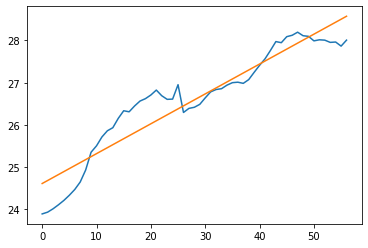

OECD members


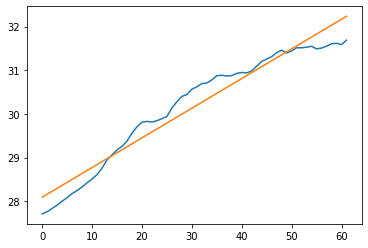

Pacific island small states


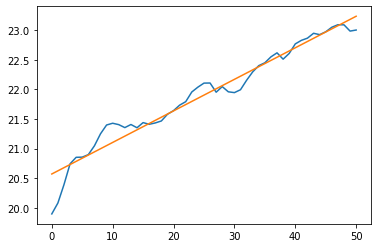

Sub-Saharan Africa (excluding high income)


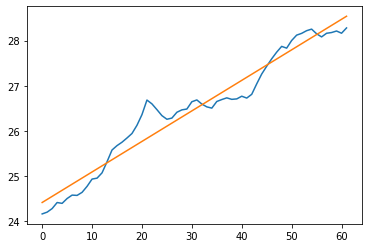

Sub-Saharan Africa


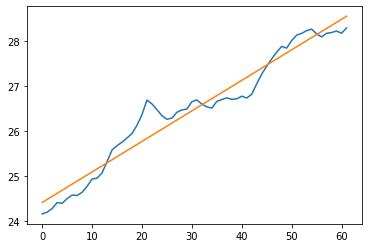

East Asia & Pacific (IDA & IBRD countries)


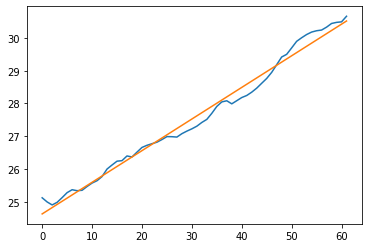

Europe & Central Asia (IDA & IBRD countries)


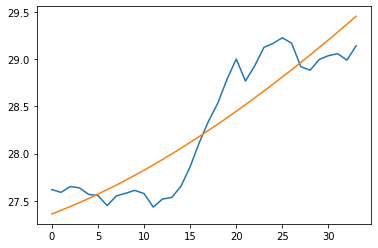

Latin America & the Caribbean (IDA & IBRD countries)


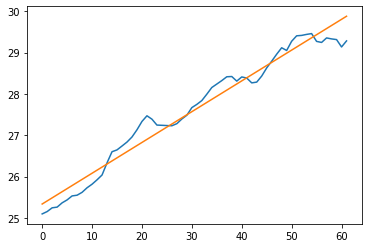

Middle East & North Africa (IDA & IBRD countries)


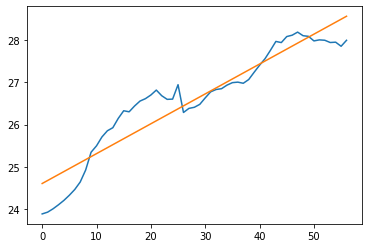

South Asia (IDA & IBRD)


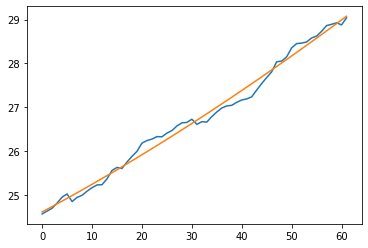

Sub-Saharan Africa (IDA & IBRD countries)


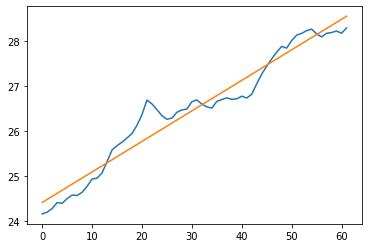

In [220]:
#Global Regions
ctrR,gammasR,kR=dynamicComputeParams(data,False)

/var/folders/f3/7npqvhls75s3wz_ddb_zvd7w0000gr/T/ipykernel_19752/4141625145.py:62: RuntimeWarning: divide by zero encountered in log
  plt.scatter((gammas),np.log(k),alpha=.5)
/var/folders/f3/7npqvhls75s3wz_ddb_zvd7w0000gr/T/ipykernel_19752/4141625145.py:62: RuntimeWarning: invalid value encountered in log
  plt.scatter((gammas),np.log(k),alpha=.5)
/var/folders/f3/7npqvhls75s3wz_ddb_zvd7w0000gr/T/ipykernel_19752/4141625145.py:66: RuntimeWarning: invalid value encountered in log
  ax.annotate(c, (x, np.log(y)),alpha=.5)


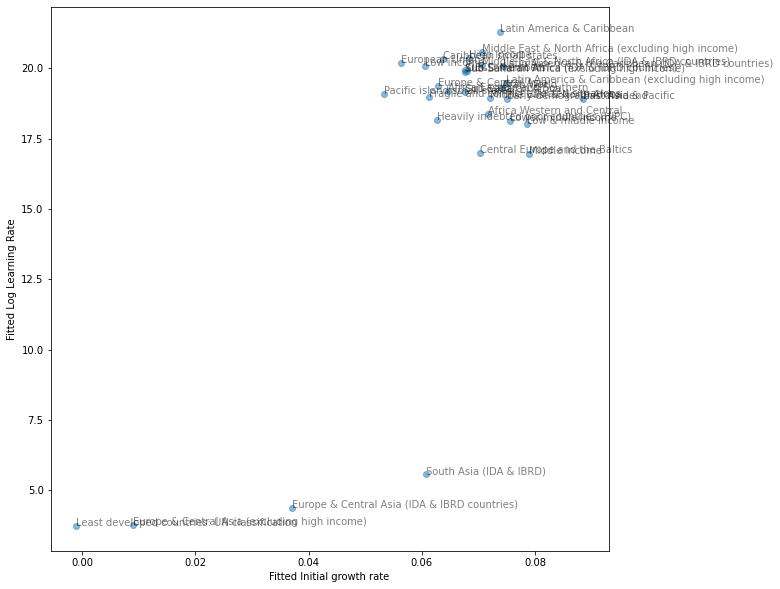

In [221]:
plotCtrData(ctrR,gammasR,kR)

Aruba


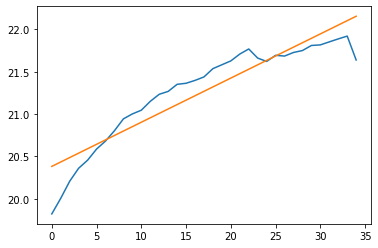

Africa Eastern and Southern


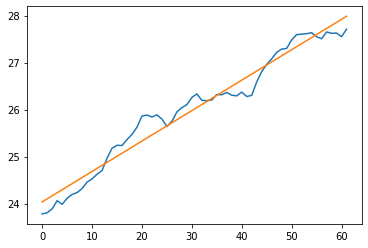

Afghanistan


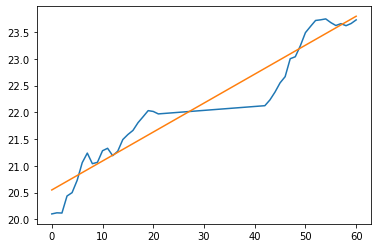

Africa Western and Central


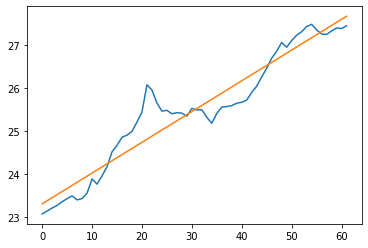

Angola


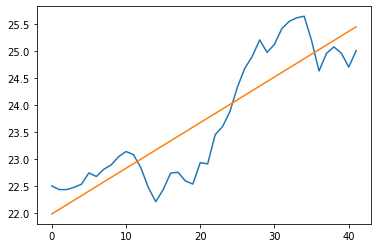

Albania


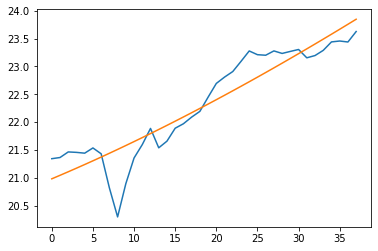

Andorra


/var/folders/f3/7npqvhls75s3wz_ddb_zvd7w0000gr/T/ipykernel_19752/3128066276.py:29: RuntimeWarning: invalid value encountered in power
  diag =np.power(d(a(m(p,lbd),x0),den),\


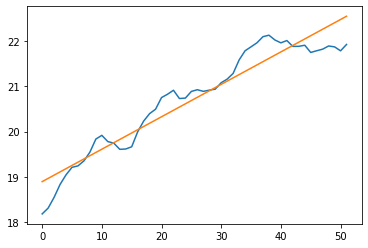

Arab World


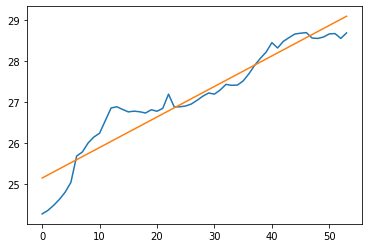

United Arab Emirates


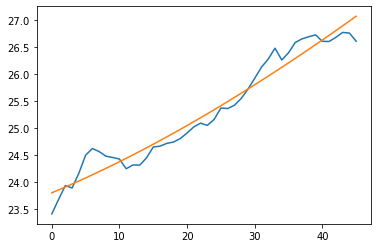

Argentina


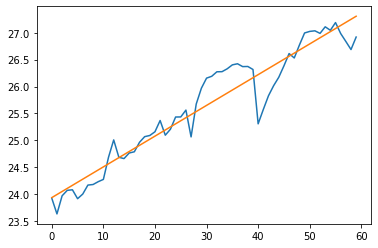

Armenia


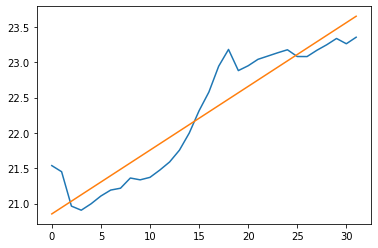

American Samoa


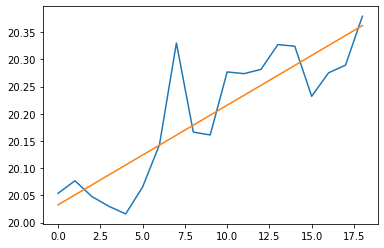

Antigua and Barbuda


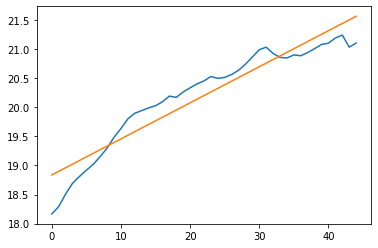

Australia


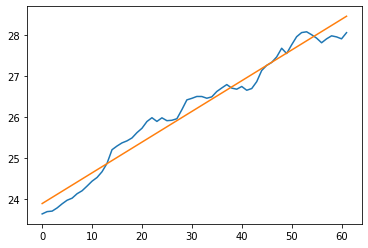

Austria


/var/folders/f3/7npqvhls75s3wz_ddb_zvd7w0000gr/T/ipykernel_19752/3128066276.py:32: RuntimeWarning: invalid value encountered in power
  odiag=np.power(d(a(m(1-p,lbd),(1-x0)),m(l-1,den)),\


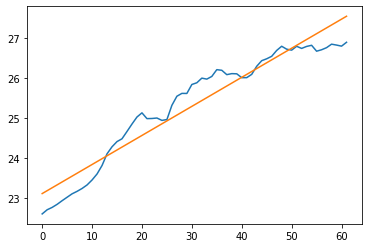

Azerbaijan


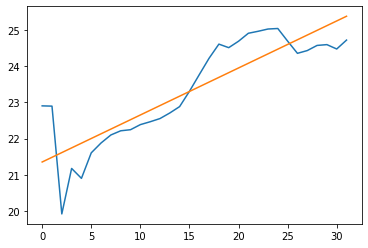

Burundi


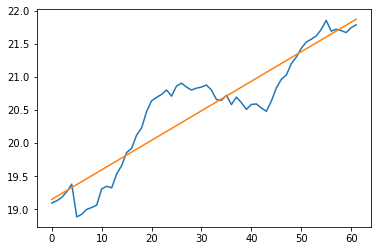

Belgium


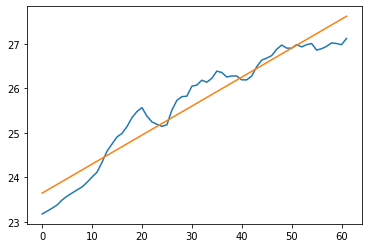

Benin


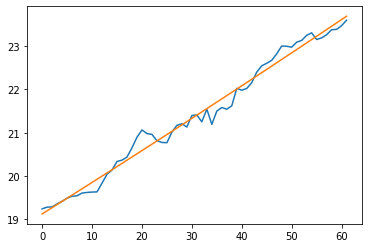

Burkina Faso


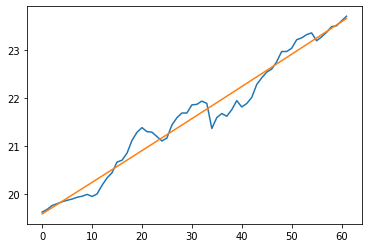

Bangladesh


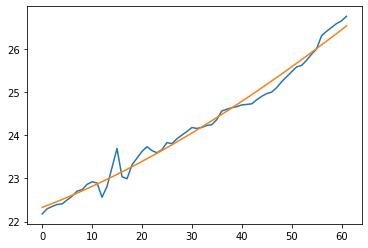

Bulgaria


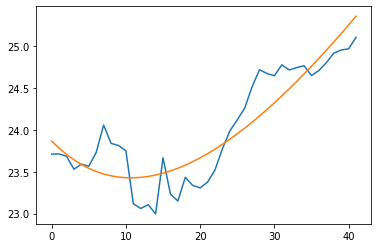

Bahrain


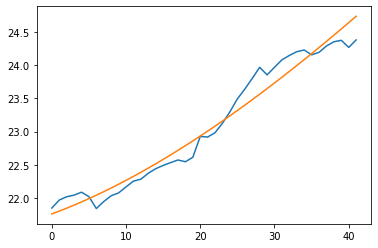

Bahamas, The


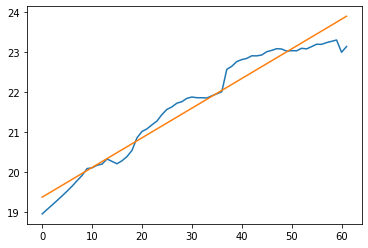

Bosnia and Herzegovina


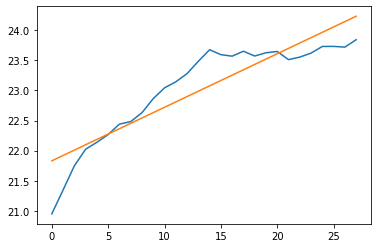

Belarus


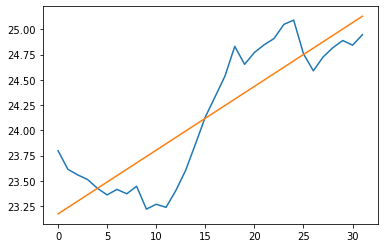

Belize


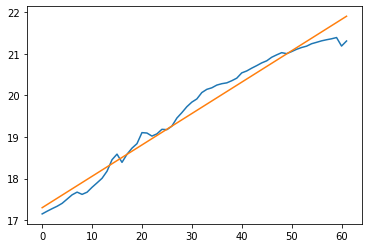

Bermuda


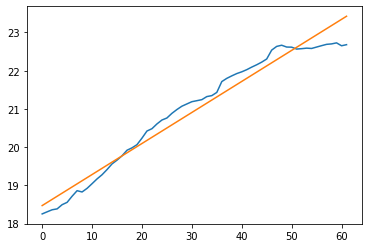

Bolivia


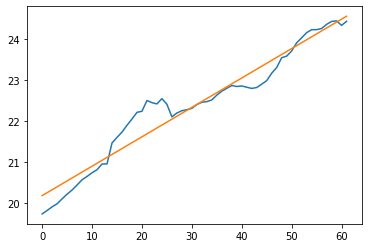

Brazil


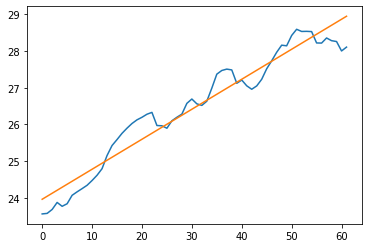

Barbados


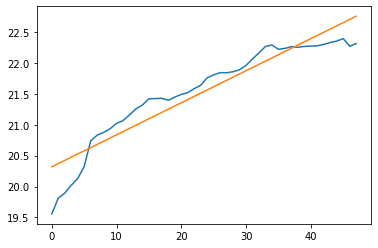

Brunei Darussalam


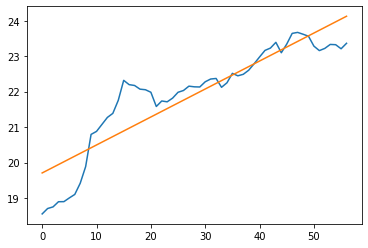

Bhutan


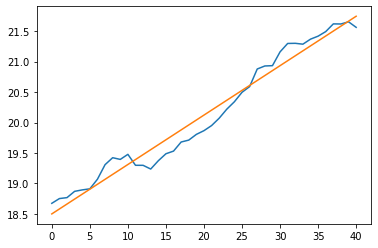

Botswana


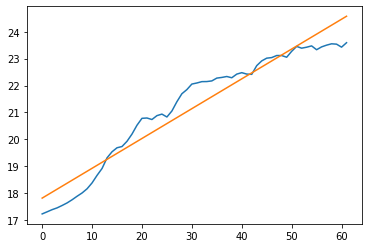

Central African Republic


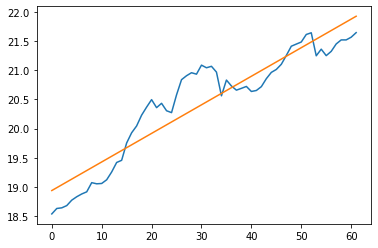

Canada


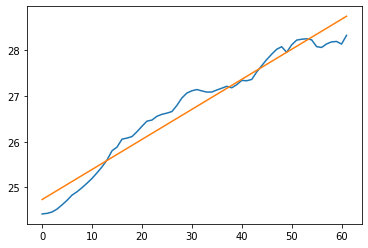

Central Europe and the Baltics


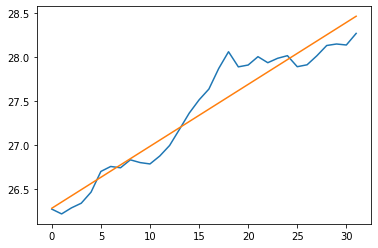

Switzerland


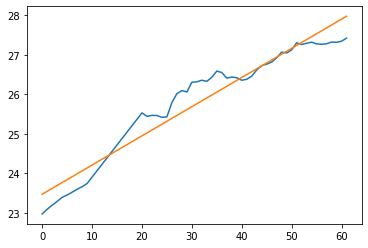

Chile


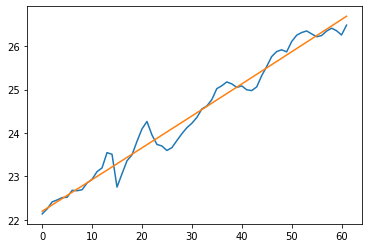

China


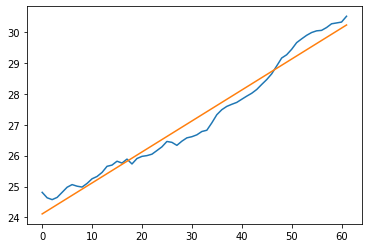

Cote d'Ivoire


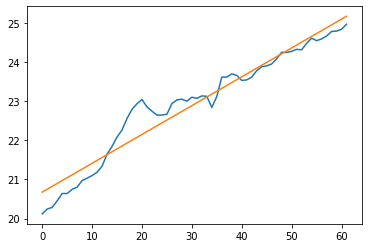

Cameroon


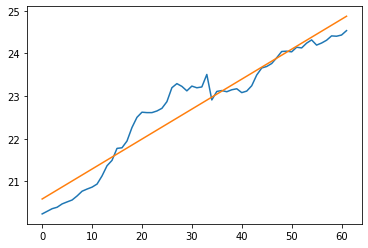

Congo, Dem. Rep.


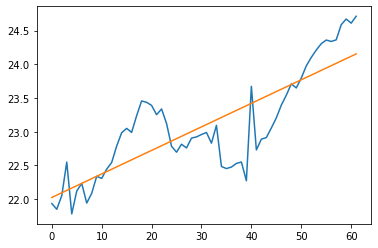

Congo, Rep.


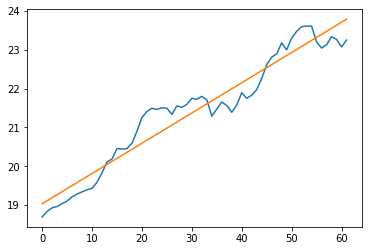

Colombia


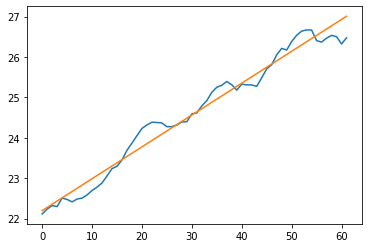

Comoros


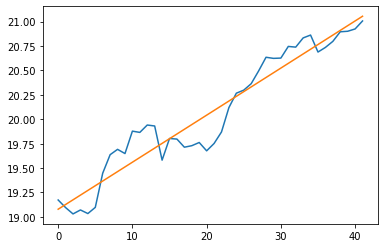

Cabo Verde


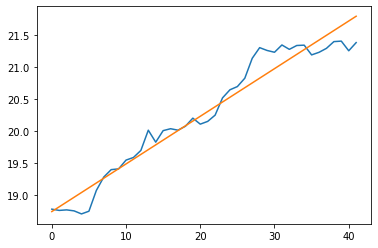

Costa Rica


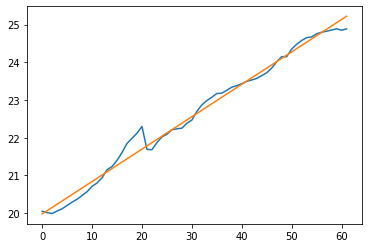

Caribbean small states


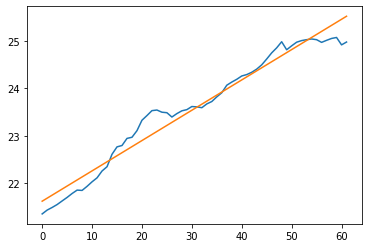

Cuba


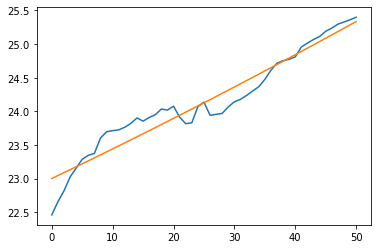

Cayman Islands


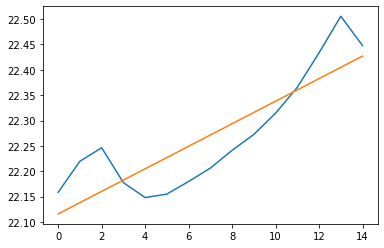

Cyprus


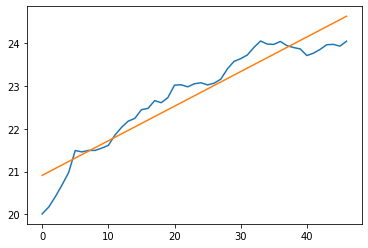

Czechia


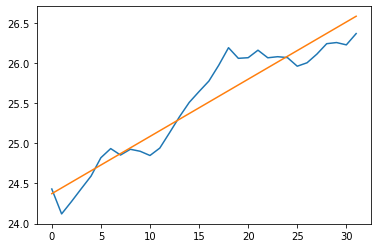

Germany


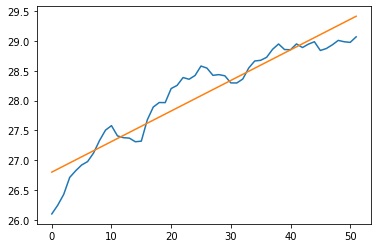

Djibouti


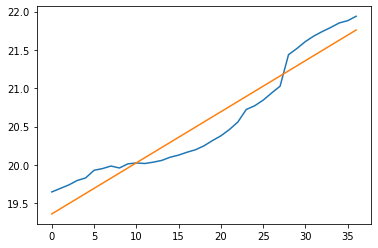

Dominica


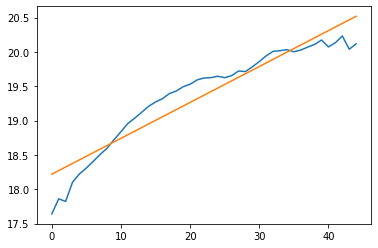

Denmark


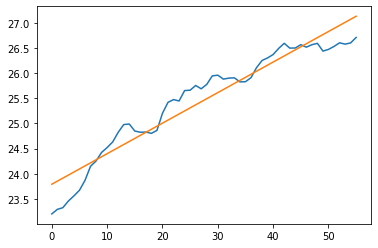

Dominican Republic


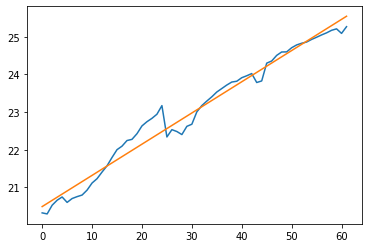

Algeria


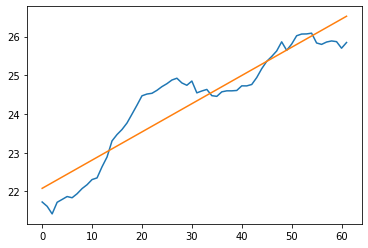

East Asia & Pacific (excluding high income)


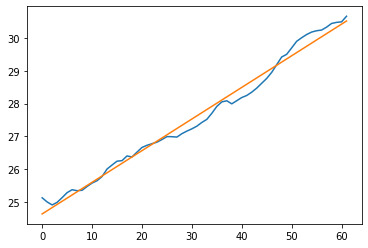

Early-demographic dividend


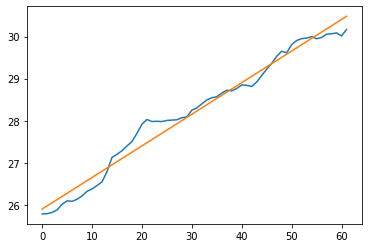

East Asia & Pacific


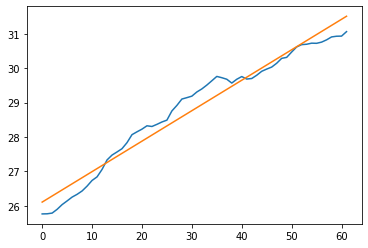

Europe & Central Asia (excluding high income)


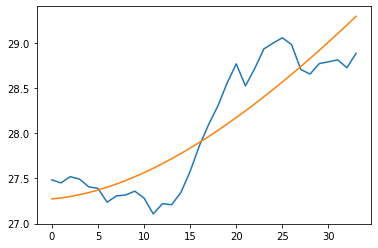

Europe & Central Asia


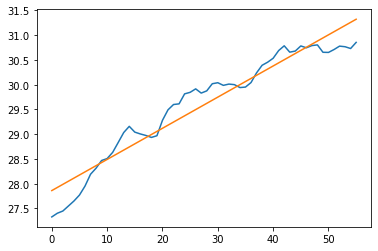

Ecuador


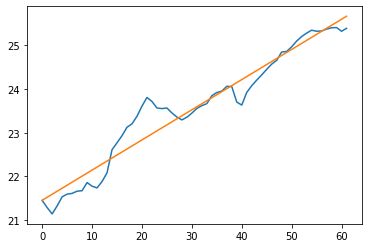

Egypt, Arab Rep.


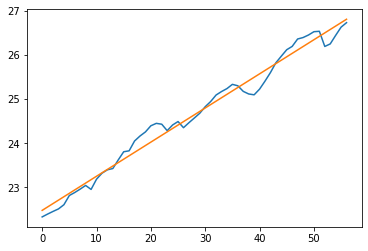

Euro area


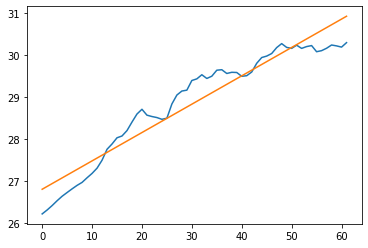

Eritrea


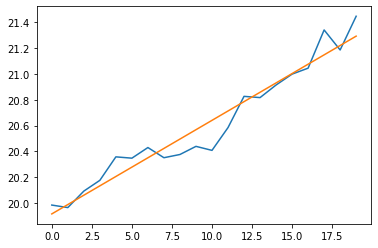

Spain


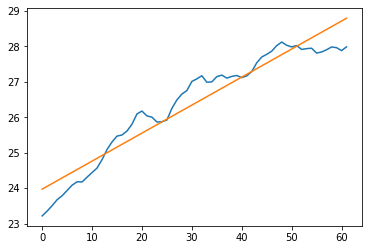

Estonia


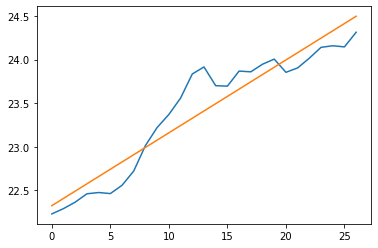

Ethiopia


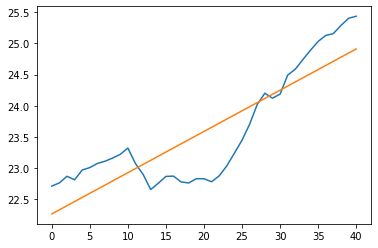

European Union


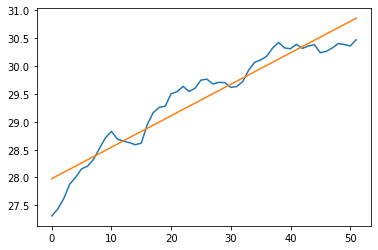

Fragile and conflict affected situations


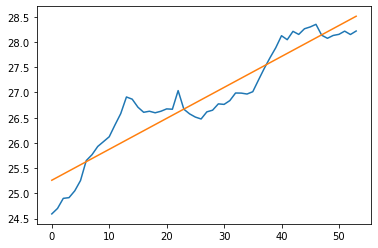

Finland


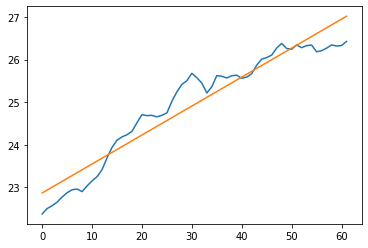

Fiji


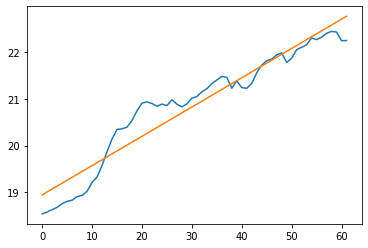

France


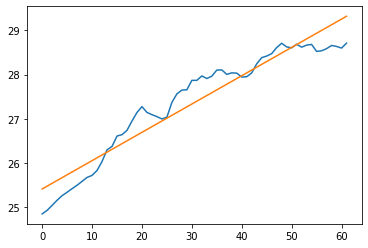

Faroe Islands


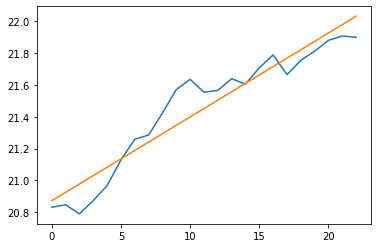

Micronesia, Fed. Sts.


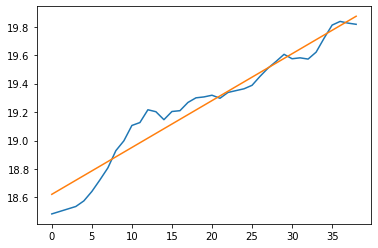

Gabon


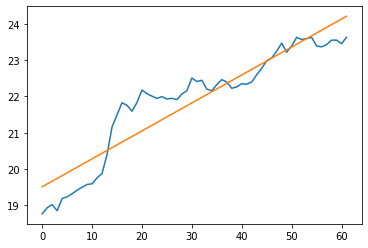

United Kingdom


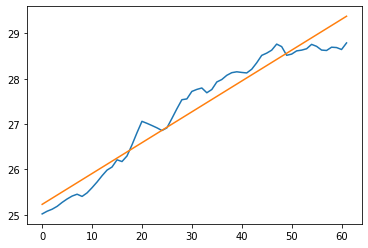

Georgia


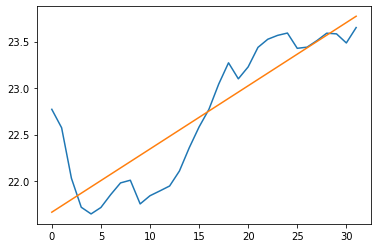

Ghana


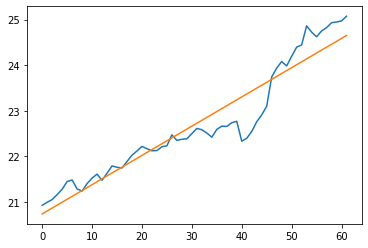

Guinea


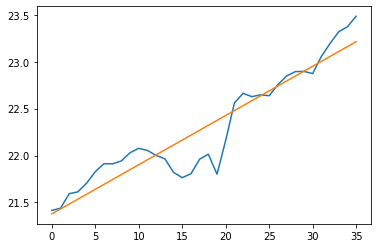

Gambia, The


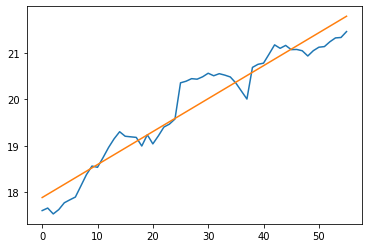

Guinea-Bissau


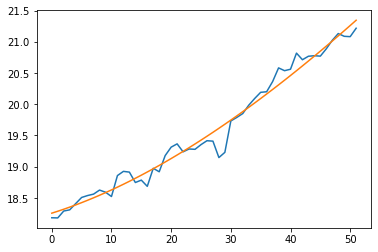

Equatorial Guinea


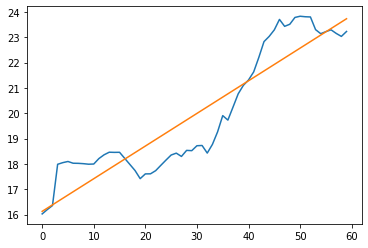

Greece


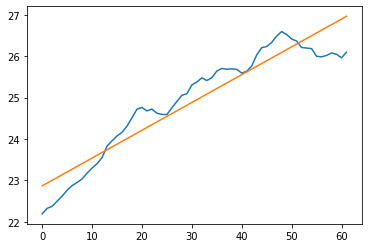

Grenada


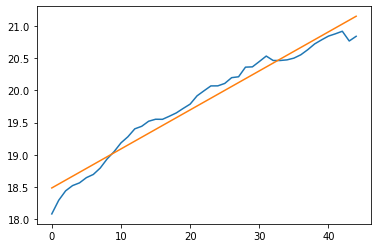

Greenland


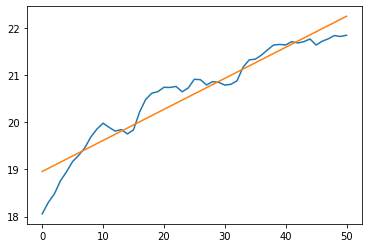

Guatemala


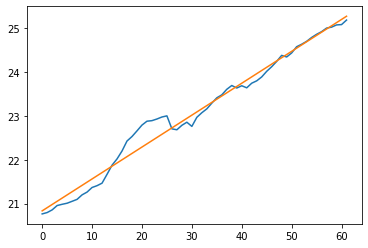

Guam


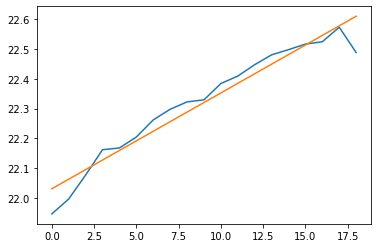

Guyana


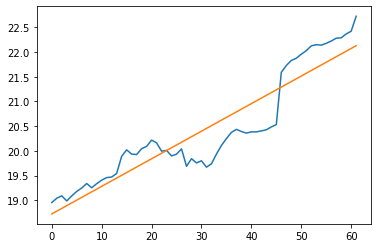

High income


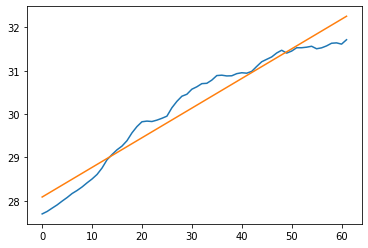

Hong Kong SAR, China


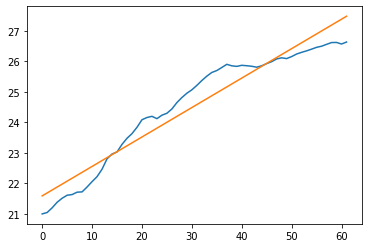

Honduras


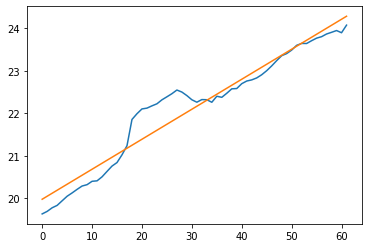

Heavily indebted poor countries (HIPC)


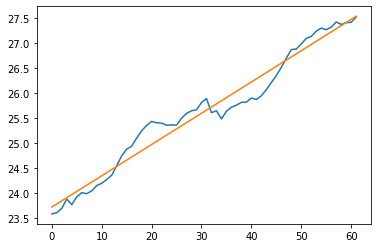

Croatia


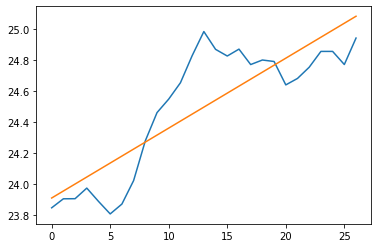

Haiti


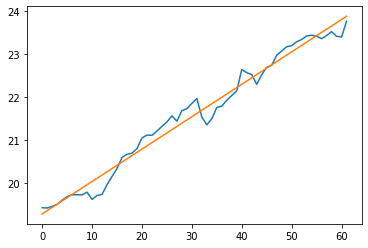

Hungary


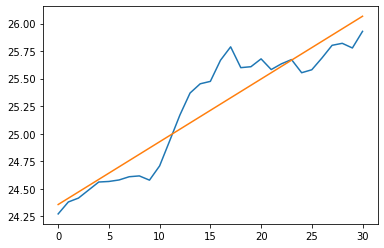

IBRD only


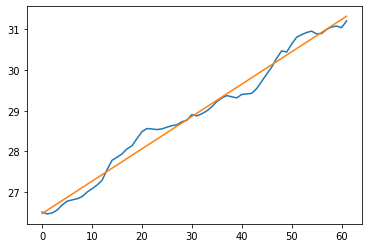

IDA & IBRD total


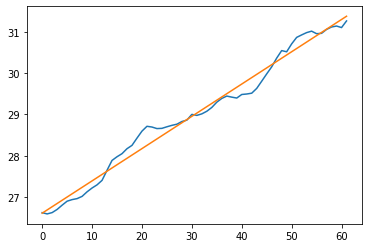

IDA total


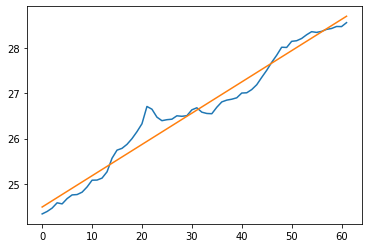

IDA blend


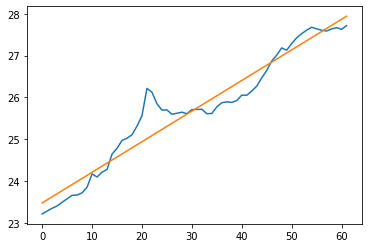

Indonesia


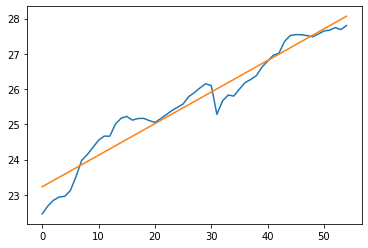

IDA only


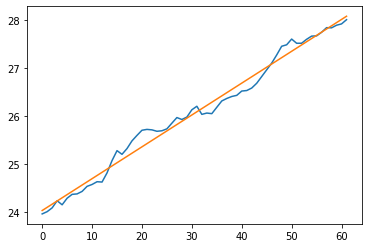

Isle of Man


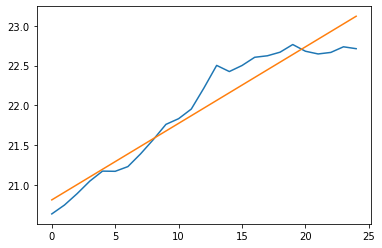

India


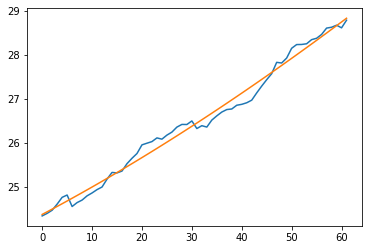

Ireland


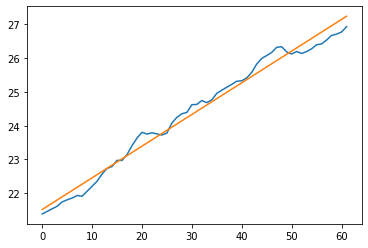

Iran, Islamic Rep.


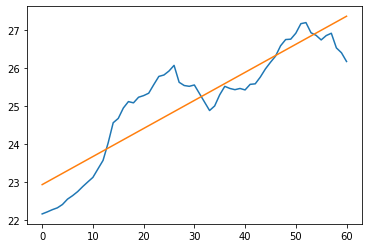

Iraq


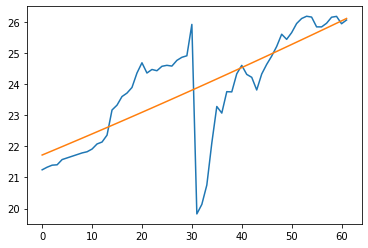

Iceland


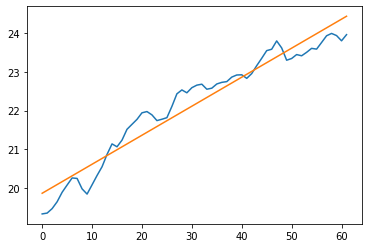

Israel


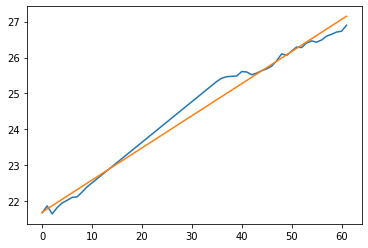

Italy


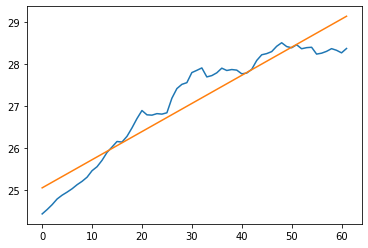

Jamaica


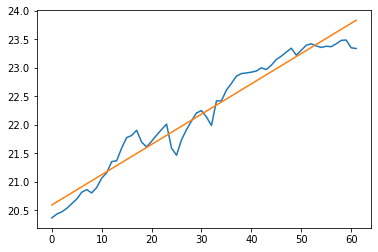

Jordan


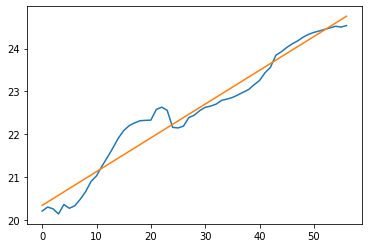

Japan


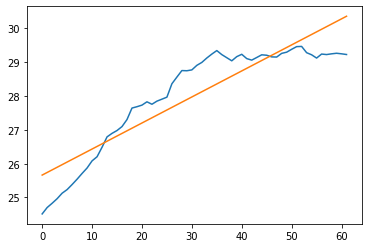

Kazakhstan


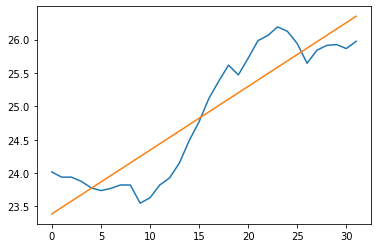

Kenya


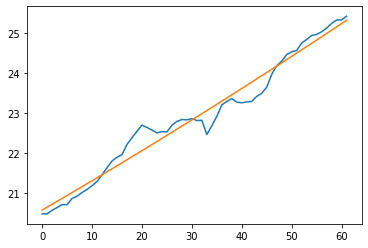

Kyrgyz Republic


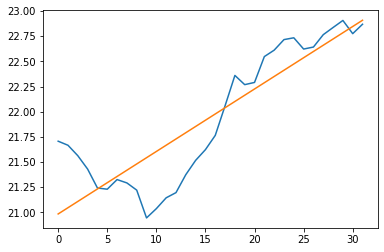

Cambodia


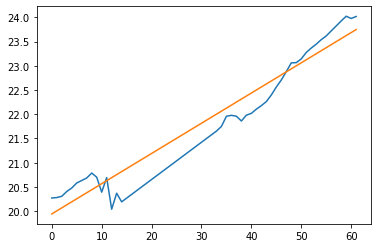

Kiribati


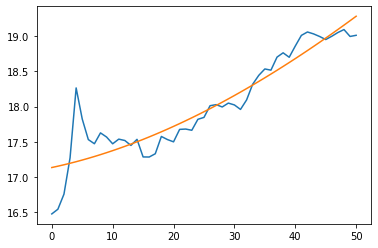

St. Kitts and Nevis


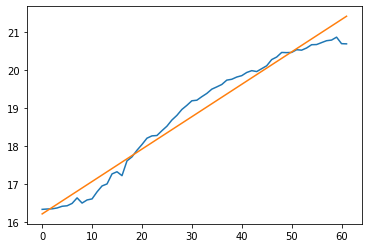

Korea, Rep.


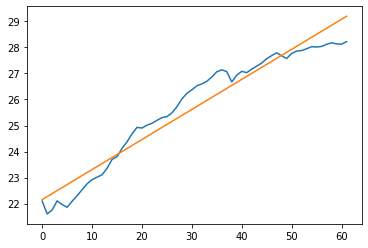

Kuwait


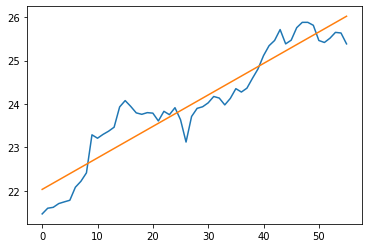

Latin America & Caribbean (excluding high income)


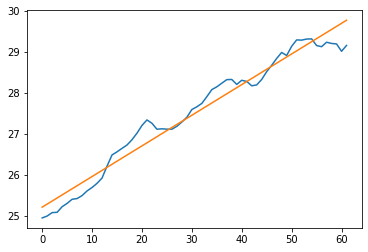

Lao PDR


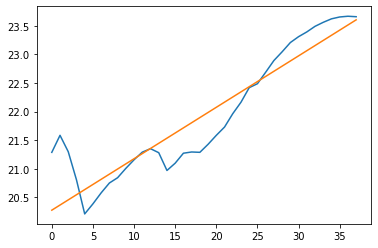

Lebanon


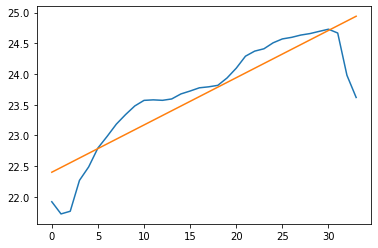

Liberia


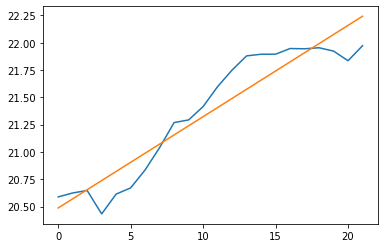

Libya


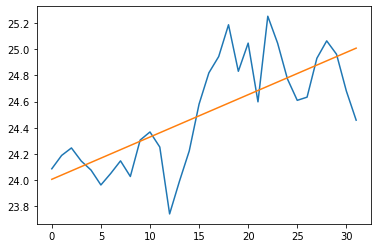

St. Lucia


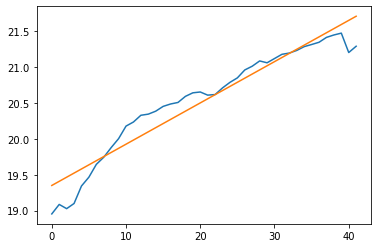

Latin America & Caribbean


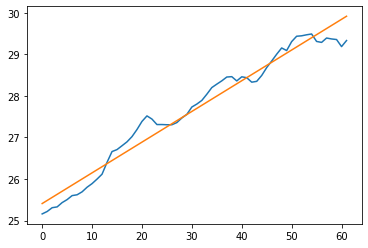

Least developed countries: UN classification


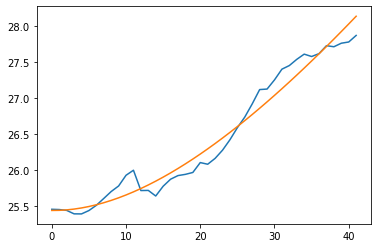

Low income


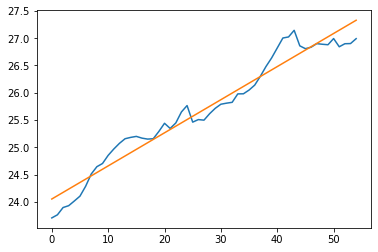

Liechtenstein


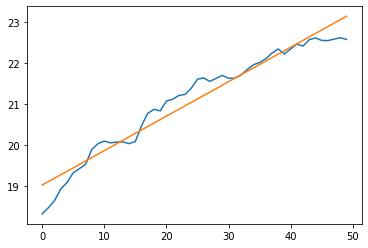

Sri Lanka


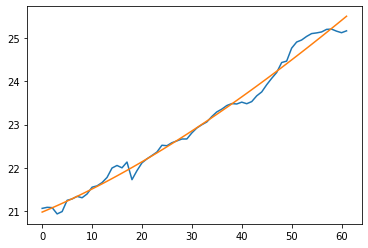

Lower middle income


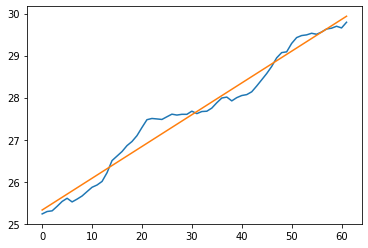

Low & middle income


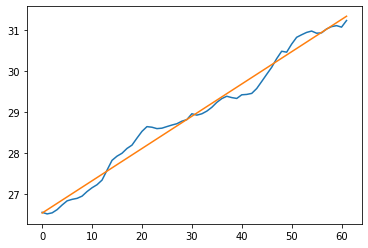

Lesotho


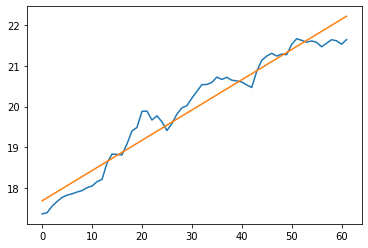

Late-demographic dividend


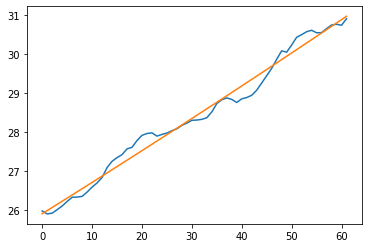

Lithuania


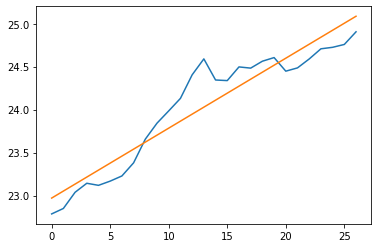

Luxembourg


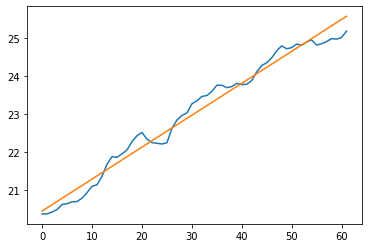

Latvia


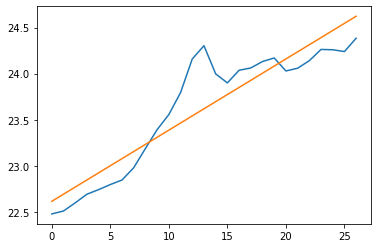

Macao SAR, China


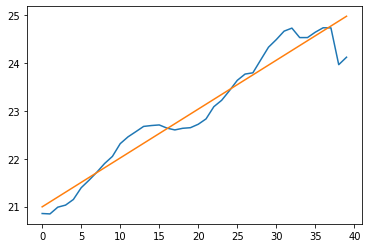

Morocco


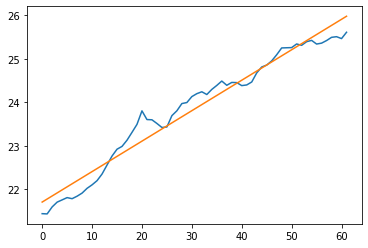

Monaco


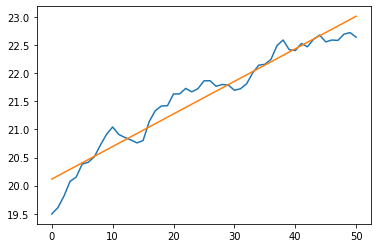

Moldova


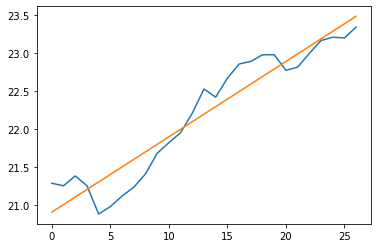

Madagascar


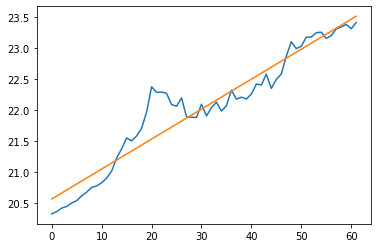

Maldives


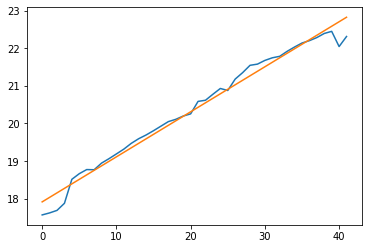

Middle East & North Africa


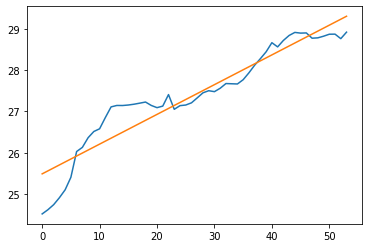

Mexico


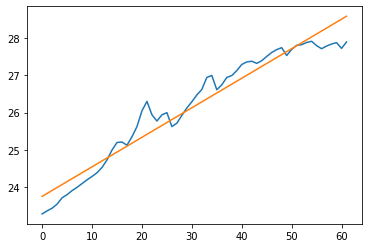

Marshall Islands


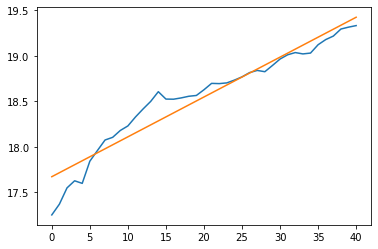

Middle income


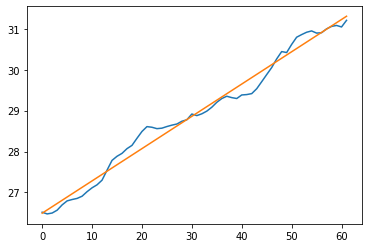

North Macedonia


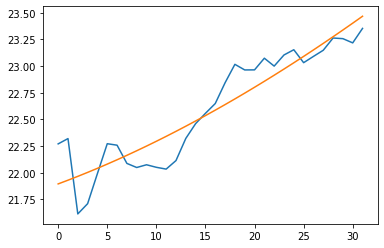

Mali


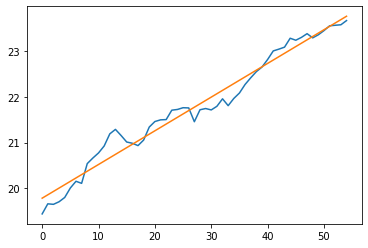

Malta


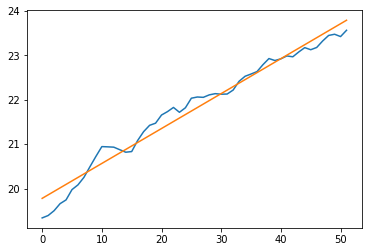

Myanmar


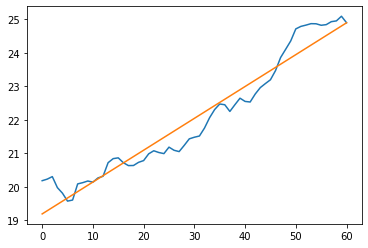

Middle East & North Africa (excluding high income)


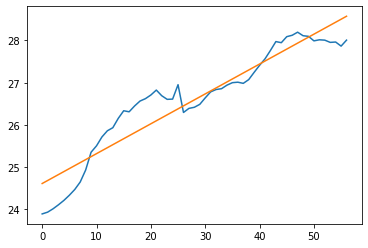

Montenegro


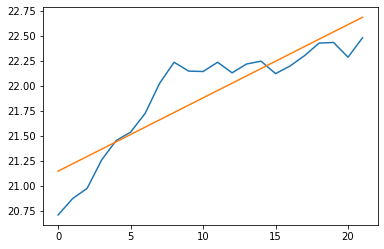

Mongolia


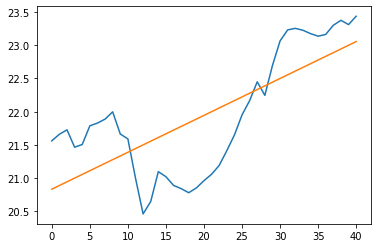

Northern Mariana Islands


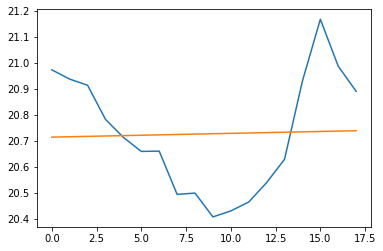

Mozambique


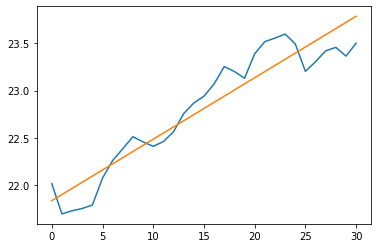

Mauritania


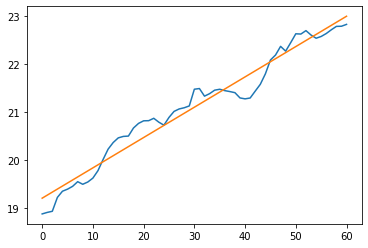

Mauritius


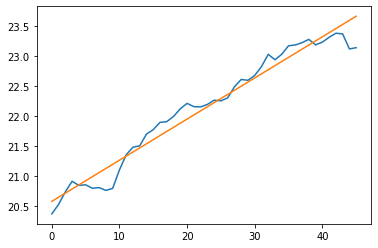

Malawi


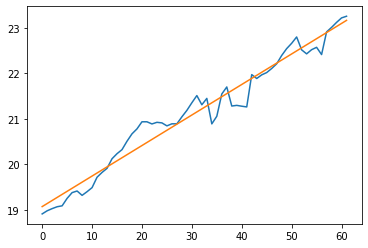

Malaysia


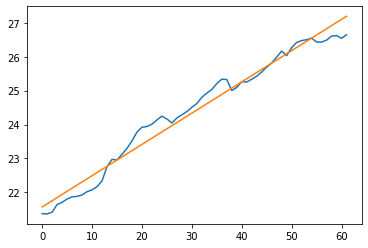

North America


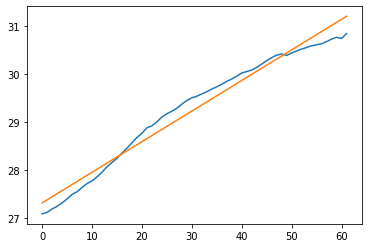

Namibia


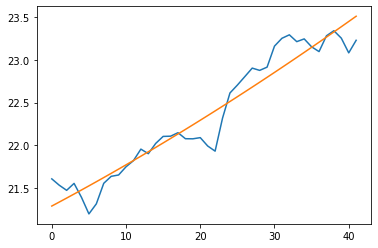

New Caledonia


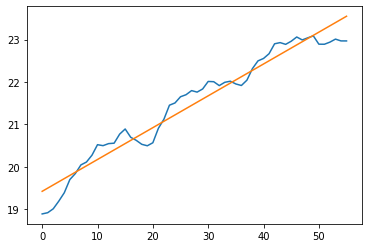

Niger


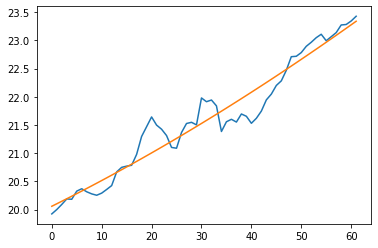

Nigeria


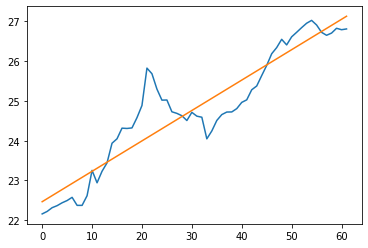

Nicaragua


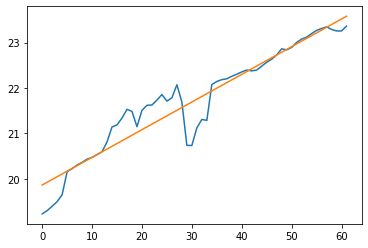

Netherlands


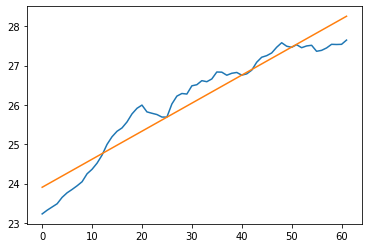

Norway


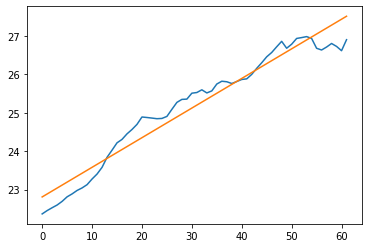

Nepal


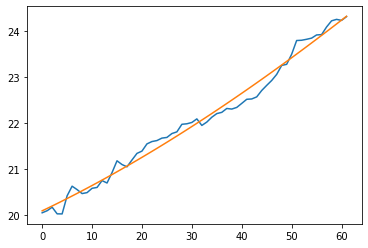

Nauru


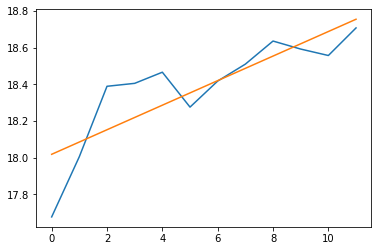

New Zealand


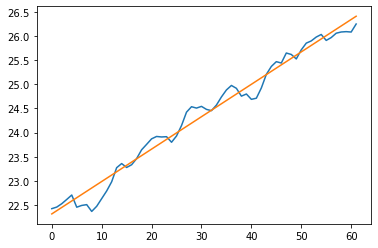

OECD members


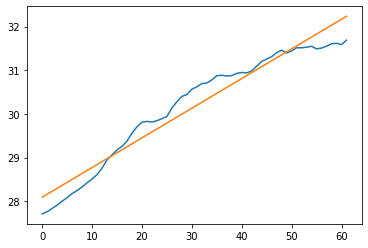

Oman


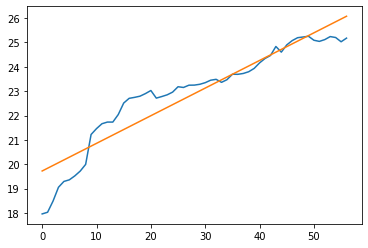

Other small states


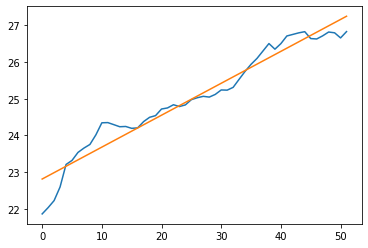

Pakistan


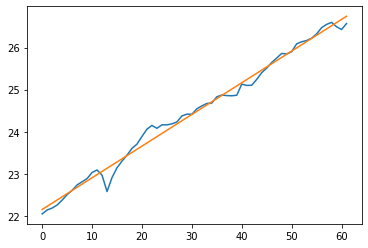

Panama


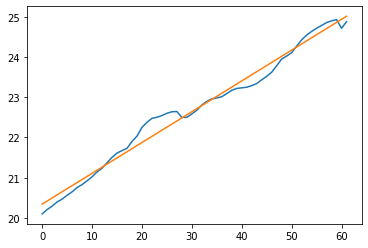

Peru


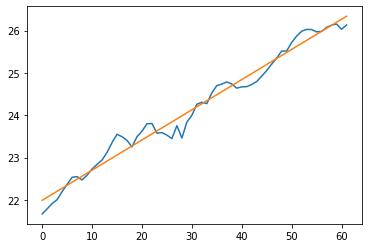

Philippines


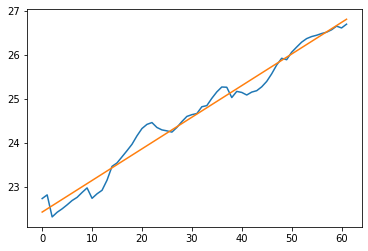

Palau


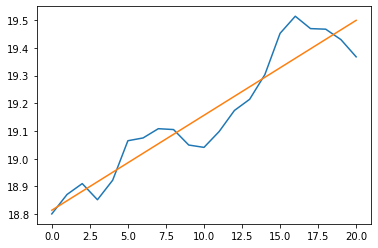

Papua New Guinea


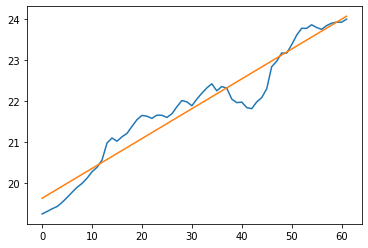

Poland


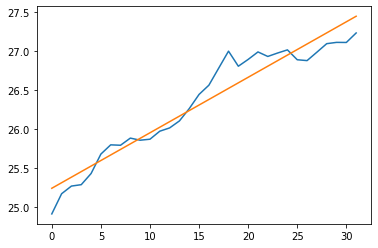

Pre-demographic dividend


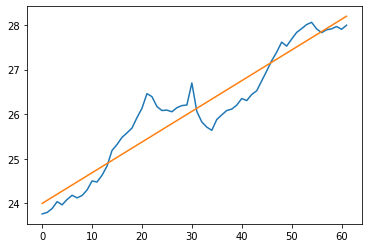

Puerto Rico


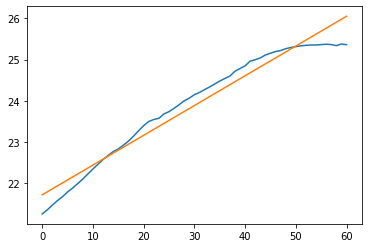

Portugal


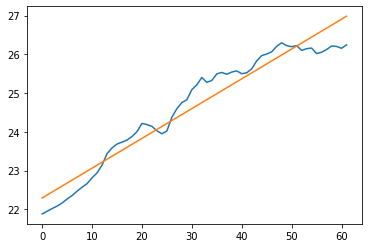

Paraguay


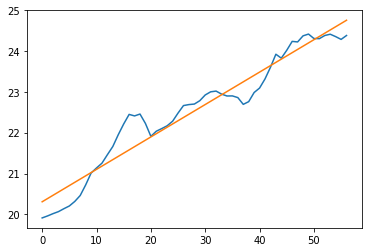

West Bank and Gaza


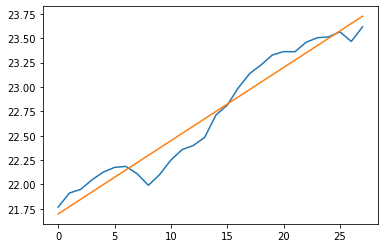

Pacific island small states


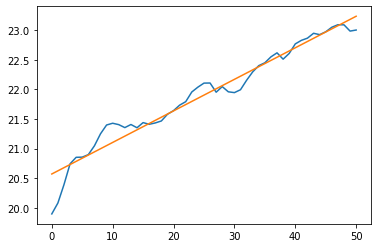

Post-demographic dividend


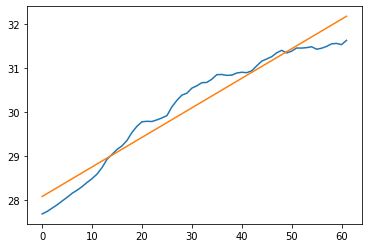

French Polynesia


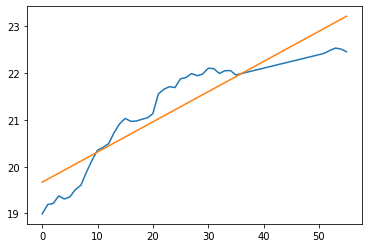

Qatar


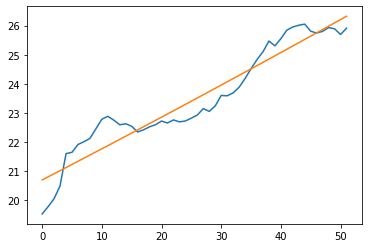

Romania


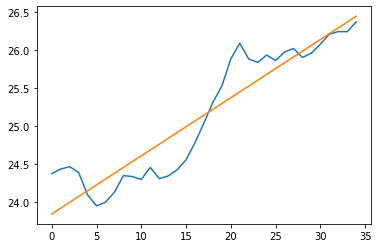

Russian Federation


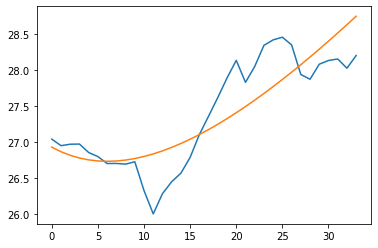

Rwanda


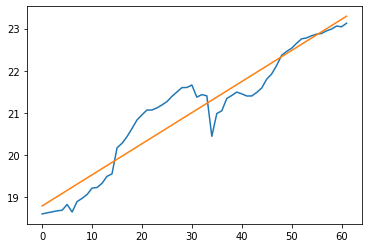

South Asia


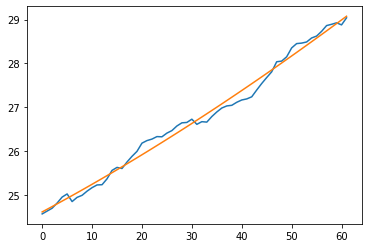

Saudi Arabia


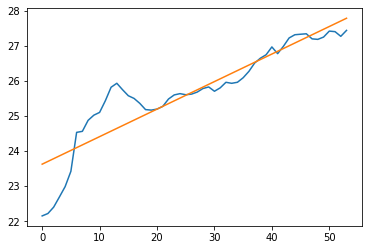

Sudan


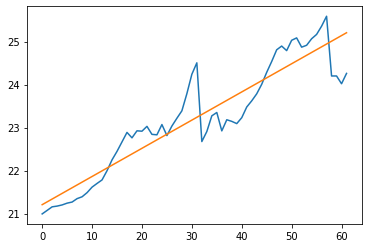

Senegal


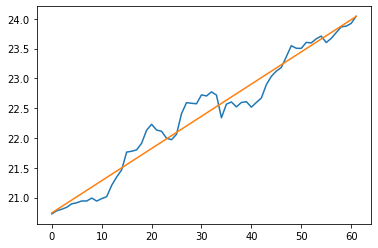

Singapore


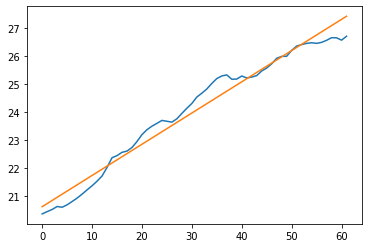

Solomon Islands


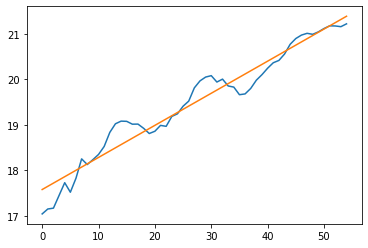

Sierra Leone


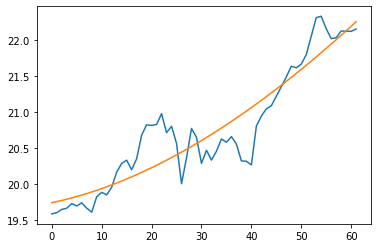

El Salvador


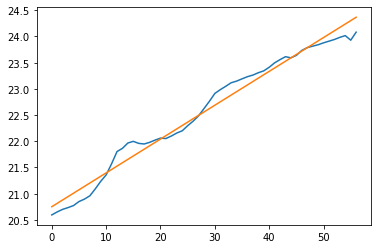

San Marino


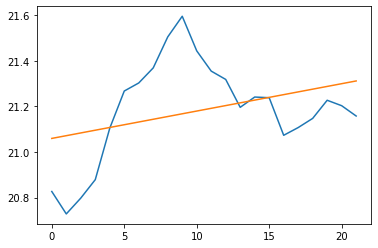

Somalia


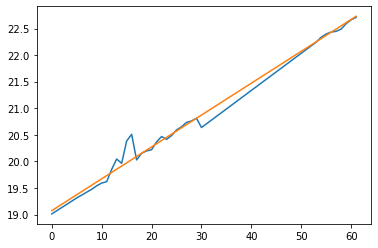

Serbia


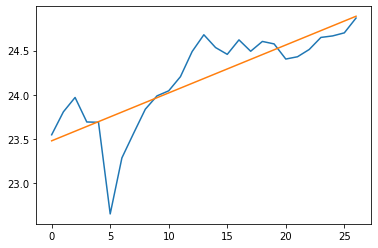

Sub-Saharan Africa (excluding high income)


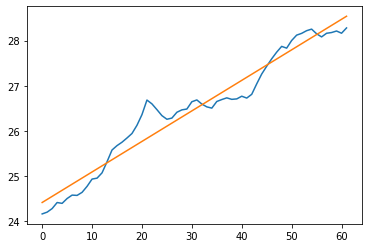

Sub-Saharan Africa


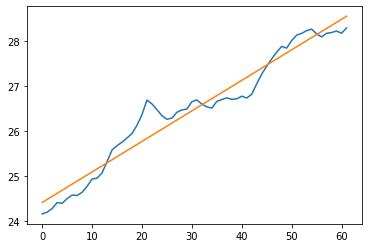

Small states


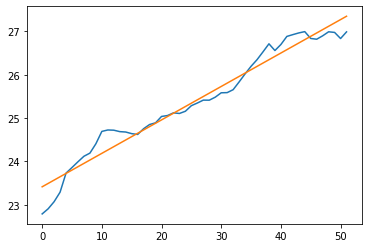

Sao Tome and Principe


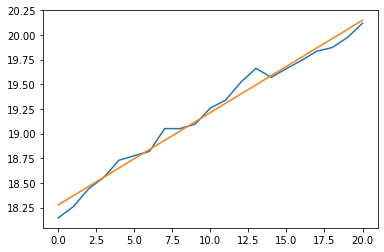

Suriname


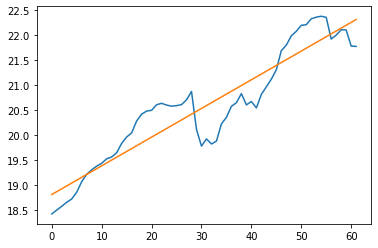

Slovak Republic


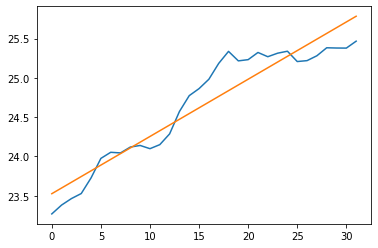

Slovenia


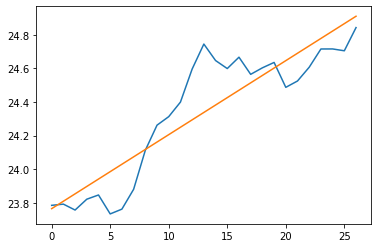

Sweden


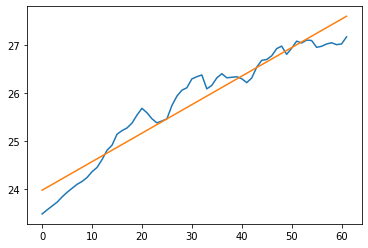

Eswatini


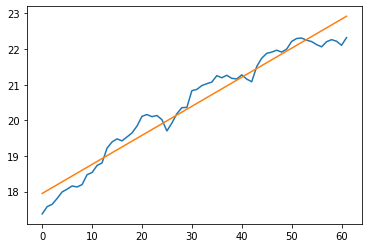

Seychelles


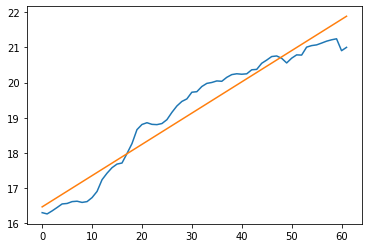

Syrian Arab Republic


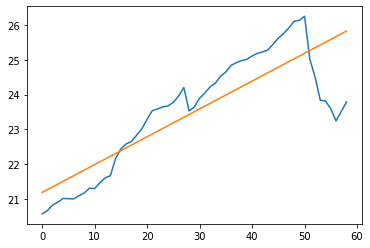

Turks and Caicos Islands


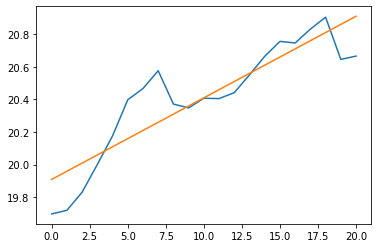

Chad


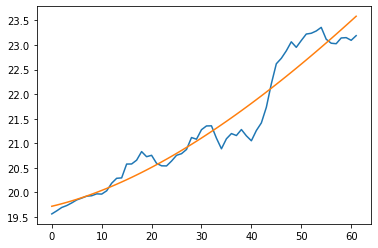

East Asia & Pacific (IDA & IBRD countries)


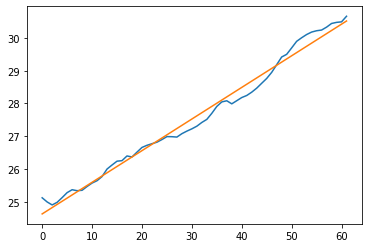

Europe & Central Asia (IDA & IBRD countries)


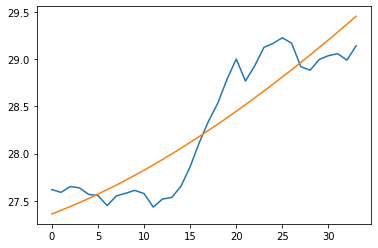

Togo


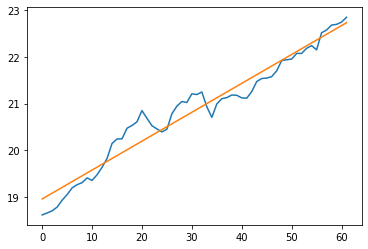

Thailand


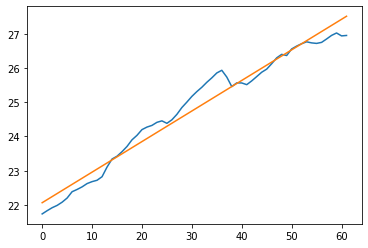

Tajikistan


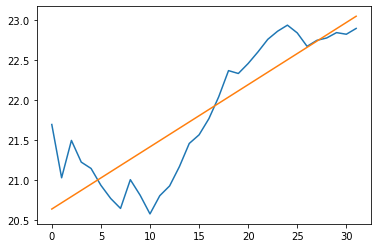

Turkmenistan


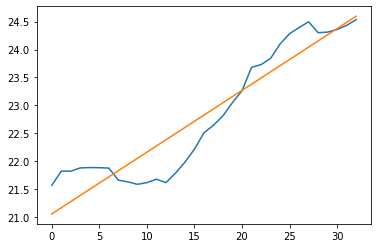

Latin America & the Caribbean (IDA & IBRD countries)


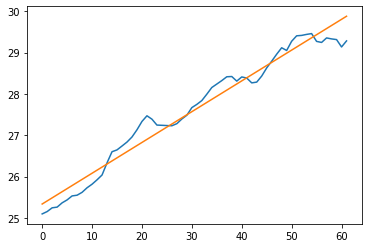

Timor-Leste


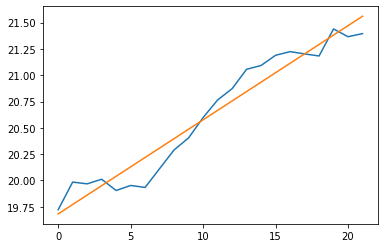

Middle East & North Africa (IDA & IBRD countries)


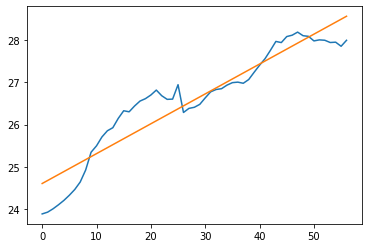

Tonga


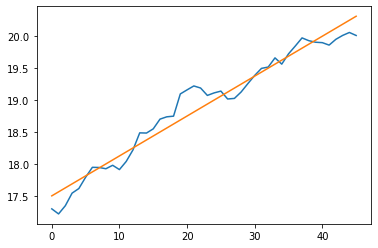

South Asia (IDA & IBRD)


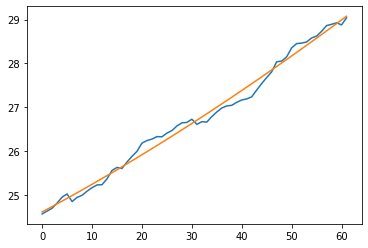

Sub-Saharan Africa (IDA & IBRD countries)


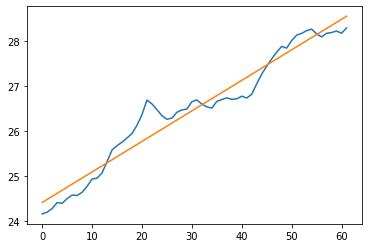

Trinidad and Tobago


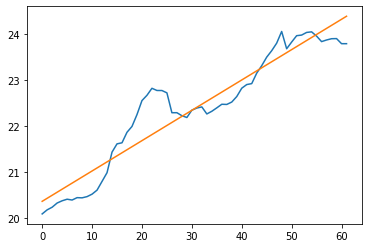

Tunisia


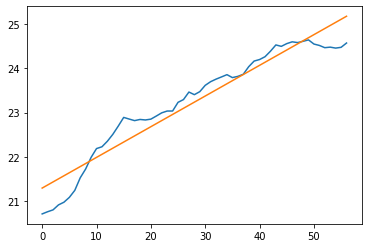

Turkiye


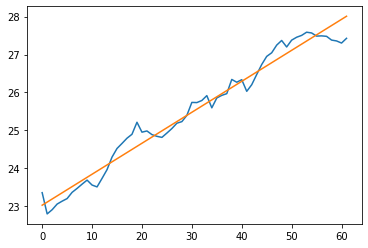

Tuvalu


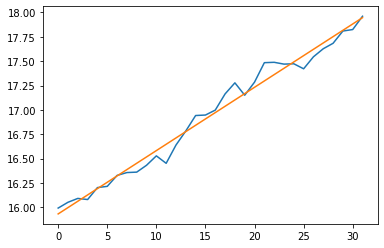

Tanzania


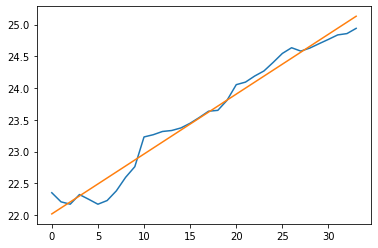

Uganda


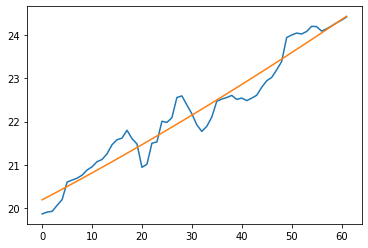

Ukraine


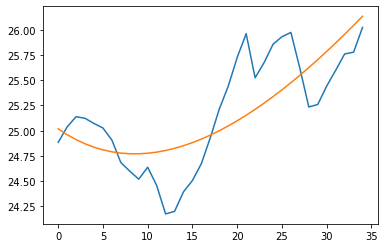

Upper middle income


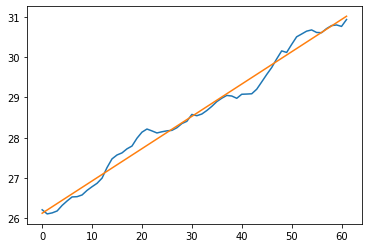

Uruguay


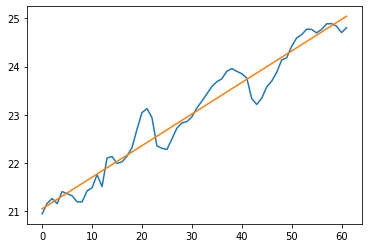

United States


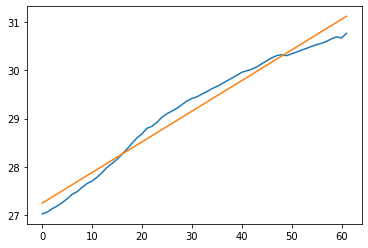

Uzbekistan


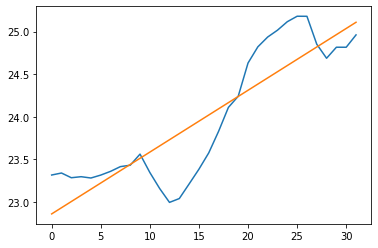

St. Vincent and the Grenadines


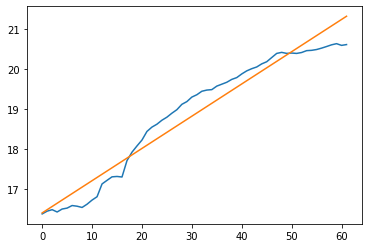

Venezuela, RB


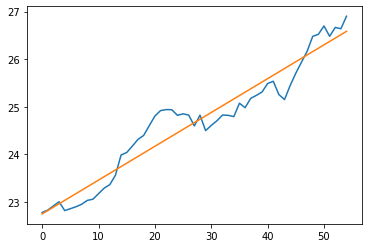

Virgin Islands (U.S.)


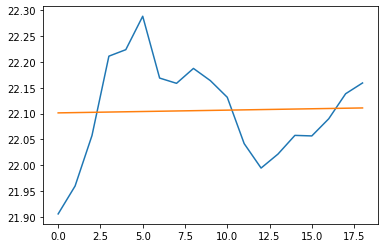

Vietnam


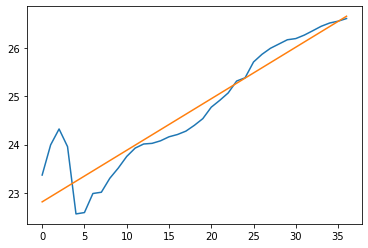

Vanuatu


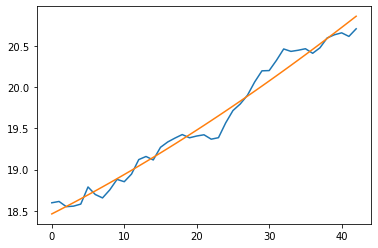

World


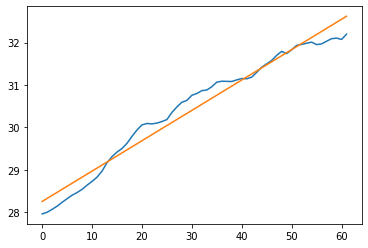

Samoa


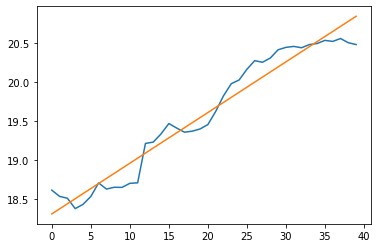

Kosovo


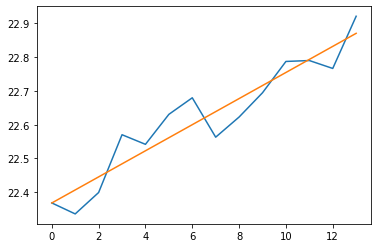

Yemen, Rep.


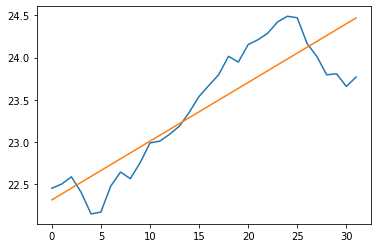

South Africa


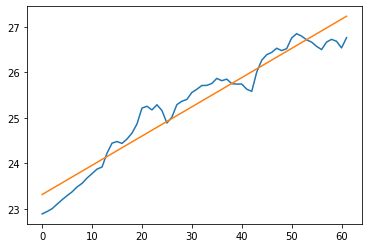

Zambia


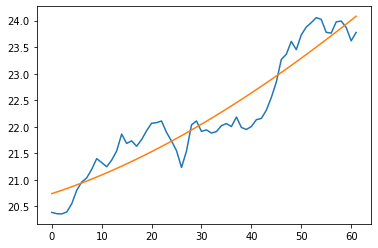

Zimbabwe


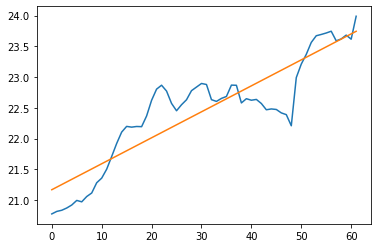

In [215]:
#Countries
ctrC,gammasC,kC=dynamicComputeParams(data,False)

/var/folders/f3/7npqvhls75s3wz_ddb_zvd7w0000gr/T/ipykernel_19752/4141625145.py:62: RuntimeWarning: divide by zero encountered in log
  plt.scatter((gammas),np.log(k),alpha=.5)
/var/folders/f3/7npqvhls75s3wz_ddb_zvd7w0000gr/T/ipykernel_19752/4141625145.py:62: RuntimeWarning: invalid value encountered in log
  plt.scatter((gammas),np.log(k),alpha=.5)
/var/folders/f3/7npqvhls75s3wz_ddb_zvd7w0000gr/T/ipykernel_19752/4141625145.py:66: RuntimeWarning: invalid value encountered in log
  ax.annotate(c, (x, np.log(y)),alpha=.5)


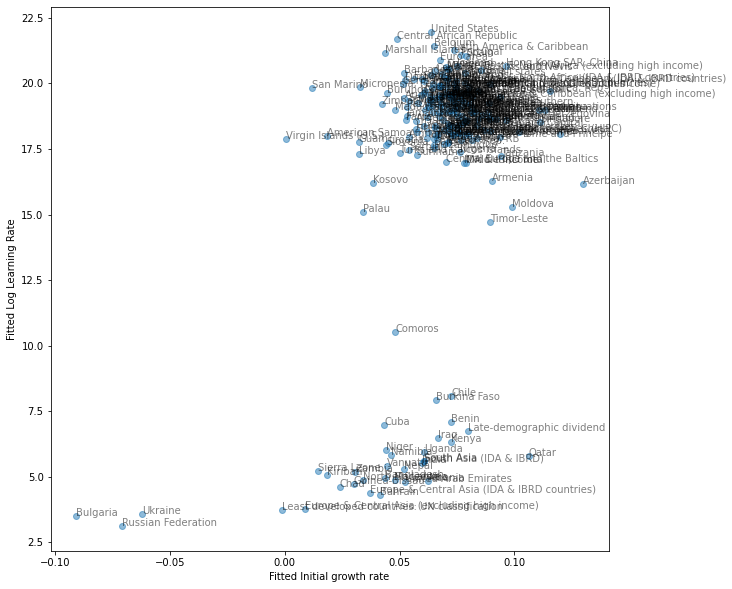

In [217]:
plotCtrData(ctrC,gammasC,kC)

Task: compute variables for 

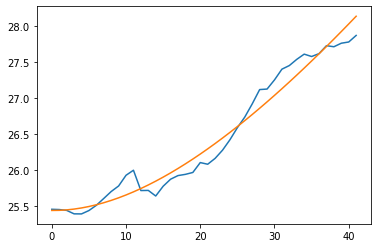

In [204]:
X=data['Least developed countries: UN classification']['years']
Y=data['Least developed countries: UN classification']['data']
X=X-X[0]
(x0f,kf,r0f),pcov=sp.optimize.curve_fit(dynamicGrowthRes,X,Y,p0=[.4,1e2,26],maxfev=10000000)
plt.plot(X,Y)
plt.plot(X,dynamicGrowthRes(X,x0f,kf,r0f))

In [205]:
g(x0f,3,.5)

-0.0006972975891808009

In [206]:
r0f

25.439791404317557

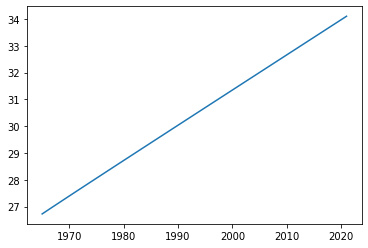

In [72]:
tt=np.linspace(1965,2021,100)
# dynamicGrowthRes(x0,l,p,k,r0,t)
r3=dynamicGrowthRes(tt,.5,1,26)
plt.plot(tt,r3)
plt.show()
# plt.plot(tt,x1)
# plt.plot(tt,x2)
# plt.plot(tt,x3)

In [149]:
g(.5,2,.7)

0.0